<a href="https://colab.research.google.com/github/vitorefazevedo/VAzevedo-sharing/blob/master/Teste%20t%C3%A9cnico%20Localiza/Teste_t%C3%A9cnico_Localiza_2%C2%B0_Desafio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste técnico Localiza

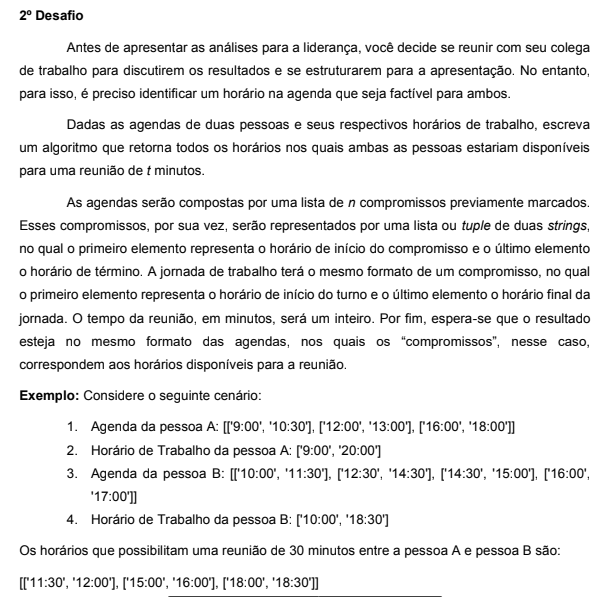

In [ ]:
import pandas as pd

In [ ]:
#Definindo as agendas e jornadas de trabalho de duas pessoas A e B:
agenda_a = [['9:00', '10:30'], ['12:00', '13:00'], ['16:00', '18:00']]
jornada_a = ['9:00', '20:00']
agenda_b = [['10:00', '11:30'], ['12:30', '14:30'], ['14:30', '15:00'], ['16:00', '17:00']]
jornada_b = ['10:00', '18:30']

In [ ]:
# Cria-se uma função que adiciona mais dois intervalos de indisponibilidade no mesmo formato de um compromisso. 
# Estes intervalos são referentes ao início e término da jornada de trabalho:

def incluir_jornada(agenda, jornada):
  agenda.append(['00:00', jornada[0]])
  agenda.append([jornada[1], '23:59'])
  return agenda

In [ ]:
incluir_jornada(agenda_a, jornada_a)

[['9:00', '10:30'],
 ['12:00', '13:00'],
 ['16:00', '18:00'],
 ['00:00', '9:00'],
 ['20:00', '23:59']]

In [ ]:
incluir_jornada(agenda_b, jornada_b)

[['10:00', '11:30'],
 ['12:30', '14:30'],
 ['14:30', '15:00'],
 ['16:00', '17:00'],
 ['00:00', '10:00'],
 ['18:30', '23:59']]

In [ ]:
agenda_conjunta = agenda_a + agenda_b
agenda_conjunta

[['9:00', '10:30'],
 ['12:00', '13:00'],
 ['16:00', '18:00'],
 ['00:00', '9:00'],
 ['20:00', '23:59'],
 ['10:00', '11:30'],
 ['12:30', '14:30'],
 ['14:30', '15:00'],
 ['16:00', '17:00'],
 ['00:00', '10:00'],
 ['18:30', '23:59']]

In [ ]:
# Uma etapa importante é converter os horários de string pra datetime para que possam ser ordenados
for compromisso in range(len(agenda_conjunta)):
  for horario in range(len(agenda_conjunta[compromisso])):
    agenda_conjunta[compromisso][horario] = pd.Timestamp(agenda_conjunta[compromisso][horario])

agenda_conjunta

[[Timestamp('2021-09-07 09:00:00'), Timestamp('2021-09-07 10:30:00')],
 [Timestamp('2021-09-07 12:00:00'), Timestamp('2021-09-07 13:00:00')],
 [Timestamp('2021-09-07 16:00:00'), Timestamp('2021-09-07 18:00:00')],
 [Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-07 09:00:00')],
 [Timestamp('2021-09-07 20:00:00'), Timestamp('2021-09-07 23:59:00')],
 [Timestamp('2021-09-07 10:00:00'), Timestamp('2021-09-07 11:30:00')],
 [Timestamp('2021-09-07 12:30:00'), Timestamp('2021-09-07 14:30:00')],
 [Timestamp('2021-09-07 14:30:00'), Timestamp('2021-09-07 15:00:00')],
 [Timestamp('2021-09-07 16:00:00'), Timestamp('2021-09-07 17:00:00')],
 [Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-07 10:00:00')],
 [Timestamp('2021-09-07 18:30:00'), Timestamp('2021-09-07 23:59:00')]]

In [ ]:
# Esta etapa ordena os compromissos pelos seus horários de início de forma crescente.
agenda_conjunta.sort(key = lambda x: x[0])
agenda_conjunta

[[Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-07 09:00:00')],
 [Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-07 10:00:00')],
 [Timestamp('2021-09-07 09:00:00'), Timestamp('2021-09-07 10:30:00')],
 [Timestamp('2021-09-07 10:00:00'), Timestamp('2021-09-07 11:30:00')],
 [Timestamp('2021-09-07 12:00:00'), Timestamp('2021-09-07 13:00:00')],
 [Timestamp('2021-09-07 12:30:00'), Timestamp('2021-09-07 14:30:00')],
 [Timestamp('2021-09-07 14:30:00'), Timestamp('2021-09-07 15:00:00')],
 [Timestamp('2021-09-07 16:00:00'), Timestamp('2021-09-07 18:00:00')],
 [Timestamp('2021-09-07 16:00:00'), Timestamp('2021-09-07 17:00:00')],
 [Timestamp('2021-09-07 18:30:00'), Timestamp('2021-09-07 23:59:00')],
 [Timestamp('2021-09-07 20:00:00'), Timestamp('2021-09-07 23:59:00')]]

In [ ]:
#Em seguida  mescla-se os compromissos de todos para obter os períodos indisponíveis

compromissos_mesclados = []

compromissos_mesclados.append(agenda_conjunta[0])

for compromisso in agenda_conjunta:
  if compromissos_mesclados[-1][1] >= compromisso[0]:
    if compromissos_mesclados[-1][1] < compromisso[1]:
      compromissos_mesclados[-1][1] = compromisso[1]
  else:
    compromissos_mesclados.append(compromisso)

compromissos_mesclados

[[Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-07 11:30:00')],
 [Timestamp('2021-09-07 12:00:00'), Timestamp('2021-09-07 15:00:00')],
 [Timestamp('2021-09-07 16:00:00'), Timestamp('2021-09-07 18:00:00')],
 [Timestamp('2021-09-07 18:30:00'), Timestamp('2021-09-07 23:59:00')]]

In [ ]:
# Os períodos disponíveis para uma reunião de t minutos são os intervalos de tempo entre os compromissos mesclados:

t = 30 * pd.Timedelta('1 min')
periodos_disponiveis = []

for i in range(len(compromissos_mesclados) - 1 ):
  time_slot_len = compromissos_mesclados[i + 1][0] - compromissos_mesclados[i][1]
  #print(time_slot_len)
  if time_slot_len >= t:
    periodos_disponiveis.append([compromissos_mesclados[i][1], 
                                 compromissos_mesclados[i + 1][0]])

periodos_disponiveis

[[Timestamp('2021-09-07 11:30:00'), Timestamp('2021-09-07 12:00:00')],
 [Timestamp('2021-09-07 15:00:00'), Timestamp('2021-09-07 16:00:00')],
 [Timestamp('2021-09-07 18:00:00'), Timestamp('2021-09-07 18:30:00')]]

##Todas as etapas compiladas em uma função

In [ ]:
# Pode-se juntar tudo isso em uma única função que recebe como inputs a duração da reunião, a lista de compromissos e a jornada de trabalho dos dois participantes.

def encontrar_horários_compativeis(t, agenda_a, jornada_a, agenda_b, jornada_b):
  incluir_jornada(agenda_a, jornada_a)
  incluir_jornada(agenda_b, jornada_b)

  agenda_conjunta = agenda_a + agenda_b

  for compromisso in range(len(agenda_conjunta)):
    for horario in range(len(agenda_conjunta[compromisso])):
      agenda_conjunta[compromisso][horario] = pd.Timestamp(agenda_conjunta[compromisso][horario])
  
  agenda_conjunta.sort(key = lambda x: x[0])

  compromissos_mesclados = []

  compromissos_mesclados.append(agenda_conjunta[0])

  for compromisso in agenda_conjunta:
    if compromissos_mesclados[-1][1] >= compromisso[0]:
      if compromissos_mesclados[-1][1] < compromisso[1]:
        compromissos_mesclados[-1][1] = compromisso[1]
    else:
      compromissos_mesclados.append(compromisso)
  
  t = t * pd.Timedelta('1 min')
  periodos_disponiveis = []

  for i in range(len(compromissos_mesclados) - 1 ):
    time_slot_len = compromissos_mesclados[i + 1][0] - compromissos_mesclados[i][1]
    #print(time_slot_len)
    if time_slot_len >= t:
      periodos_disponiveis.append([compromissos_mesclados[i][1], 
                                   compromissos_mesclados[i + 1][0]])

  return periodos_disponiveis

### Testes

In [ ]:
encontrar_horários_compativeis(t = 30, agenda_a, jornada_a, agenda_b, jornada_b)

[[Timestamp('2021-09-07 11:30:00'), Timestamp('2021-09-07 12:00:00')],
 [Timestamp('2021-09-07 15:00:00'), Timestamp('2021-09-07 16:00:00')],
 [Timestamp('2021-09-07 18:00:00'), Timestamp('2021-09-07 18:30:00')]]

In [ ]:
encontrar_horários_compativeis(t = 60, agenda_a, jornada_a, agenda_b, jornada_b)

[[Timestamp('2021-09-07 15:00:00'), Timestamp('2021-09-07 16:00:00')]]

In [ ]:
encontrar_horários_compativeis(t = 61, agenda_a, jornada_a, agenda_b, jornada_b)

[]